Packages
========================

In [18]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import numpy as np

Dataset
======================

In [19]:
from tensorflow.keras.datasets import mnist
(X_train_numpy, Y_train_numpy), (X_test_numpy, Y_test_numpy) = mnist.load_data()

In [20]:
print(f"x_train's shape is {X_train_numpy.shape}\n x_test's shape is {X_test_numpy.shape}\n \
y_train's shape is {Y_train_numpy.shape}\n y_test's shape is {Y_test_numpy.shape}")

x_train's shape is (60000, 28, 28)
 x_test's shape is (10000, 28, 28)
 y_train's shape is (60000,)
 y_test's shape is (10000,)


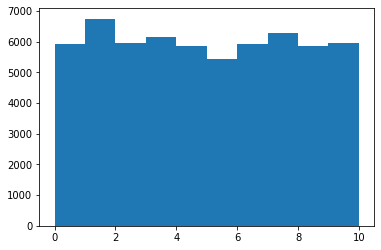

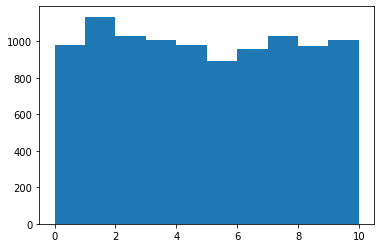

In [14]:
plt.hist(Y_train_numpy, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.show()
plt.hist(Y_test_numpy, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.show()

In [21]:
X_train = torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 255)
X_test = torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 255)
Y_train = torch.from_numpy(Y_train_numpy).type(torch.long)
Y_test = torch.from_numpy(Y_test_numpy).type(torch.long)

Softmax regression
==============================

In [22]:
class SR1(nn.Module):
    def __init__(self):
        super(SR1, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(28 * 28, 10)),  # hidden layer1
            ('softmax1', nn.Softmax(dim=1))
        ]))
        # self.fc1   = nn.Linear(28 * 28, 1500)
        # self.fc2   = nn.Linear(1500, 10)
        self.ce = nn.CrossEntropyLoss()
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.model(x)
        return x

    # x.size(0) = y.size(0)
    def loss(self, x, y):
        loss = self.ce(x, y)
        return loss


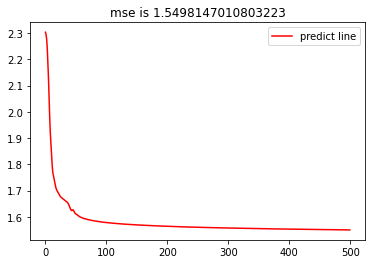

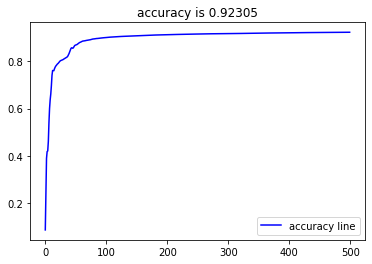

In [25]:
sr1 = SR1()
epoch = 500
optimizer = optim.SGD(sr1.parameters(), lr=0.7, momentum=0.9) # momentum = decay weight
epoch_list = []
loss_list = []
accu_list = []

while(epoch > 0):
    optimizer.zero_grad()
    out = sr1(X_train)
    loss = sr1.loss(out, Y_train)
    loss.backward()
    optimizer.step()  # updates parameters

    pred = out.data.max(1, keepdim=False)[1]
    correct = pred.eq(Y_train.data.view_as(pred)).detach().sum()
    correct_rate = correct.detach().item() / X_train.size()[0]

    epoch_list.append((500-epoch))
    loss_list.append(loss.item())
    accu_list.append(correct_rate)

    epoch -= 1

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=loss_list, color='red', label='predict line', ax=ax)
plt.title(f"mse is {loss}")
plt.show()

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=accu_list, color='blue', label='accuracy line', ax=ax)
plt.title(f"accuracy is {correct_rate}")
plt.show()

In [28]:
out = sr1(X_test)
loss = sr1.loss(out, Y_test)

pred = out.data.max(1, keepdim=False)[1]
correct = pred.eq(Y_test.data.view_as(pred)).detach().sum()
correct_rate = correct.detach().item() / X_test.size()[0]
correct_rate

0.9236